In [4]:
import pandas as pd
import numpy as np
import random as rand

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

#9/30/2017: As of now this is mostly/entirely following along with the titanic_tutorial_1 notebook

In [5]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

In [6]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [8]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [10]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
#categorical description:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Hickman, Mr. Lewis",male,1601,G6,S
freq,1,577,7,4,644


In [12]:
#891 total --> 577 men, 314 women

In [13]:
#Three (3) unique embarked ports; S most frequent (644)
#147 unique cabins (NOTE: a lot of this was NaN). 204 count. Many cabins duplicates or unlisted
#Full (891) count of tickets; 681 unique; ~22% duplicates

In [14]:
#potential survival indicators to look at:
#Pclass
#Sex
#SibSp, Parch
#Fare

In [15]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [17]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [18]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [34]:
train_df[["Fare", "Survived"]].groupby(['Fare'], as_index=False).mean().sort_values(by='Fare', ascending=False)

,Fare,Survived
247,512.3292,1.000000
246,263.0000,0.500000
245,262.3750,1.000000
244,247.5208,0.500000
243,227.5250,0.750000
242,221.7792,0.000000
241,211.5000,0.000000
240,211.3375,1.000000
239,164.8667,1.000000
238,153.4625,0.666667


In [22]:
train_df[["Age", "Survived"]].groupby(['Age'], as_index=False).mean().sort_values(by='Age', ascending=False)

,Age,Survived
87,80.00,1.000000
86,74.00,0.000000
85,71.00,0.000000
84,70.50,0.000000
83,70.00,0.000000
82,66.00,0.000000
81,65.00,0.000000
80,64.00,0.000000
79,63.00,1.000000
78,62.00,0.500000


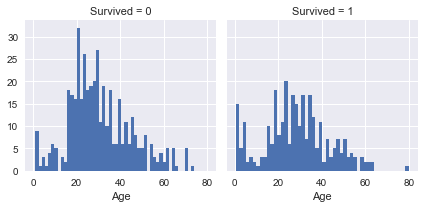

In [27]:
g_age = sns.FacetGrid(train_df, col='Survived')
g_age.map(plt.hist, 'Age', bins=50)

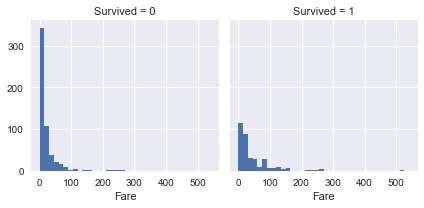

In [39]:
#and now for fare
trunc_bins = np.arange(0,550,15)
g_fare = sns.FacetGrid(train_df, col='Survived')
g_fare.map(plt.hist, 'Fare', bins=trunc_bins)